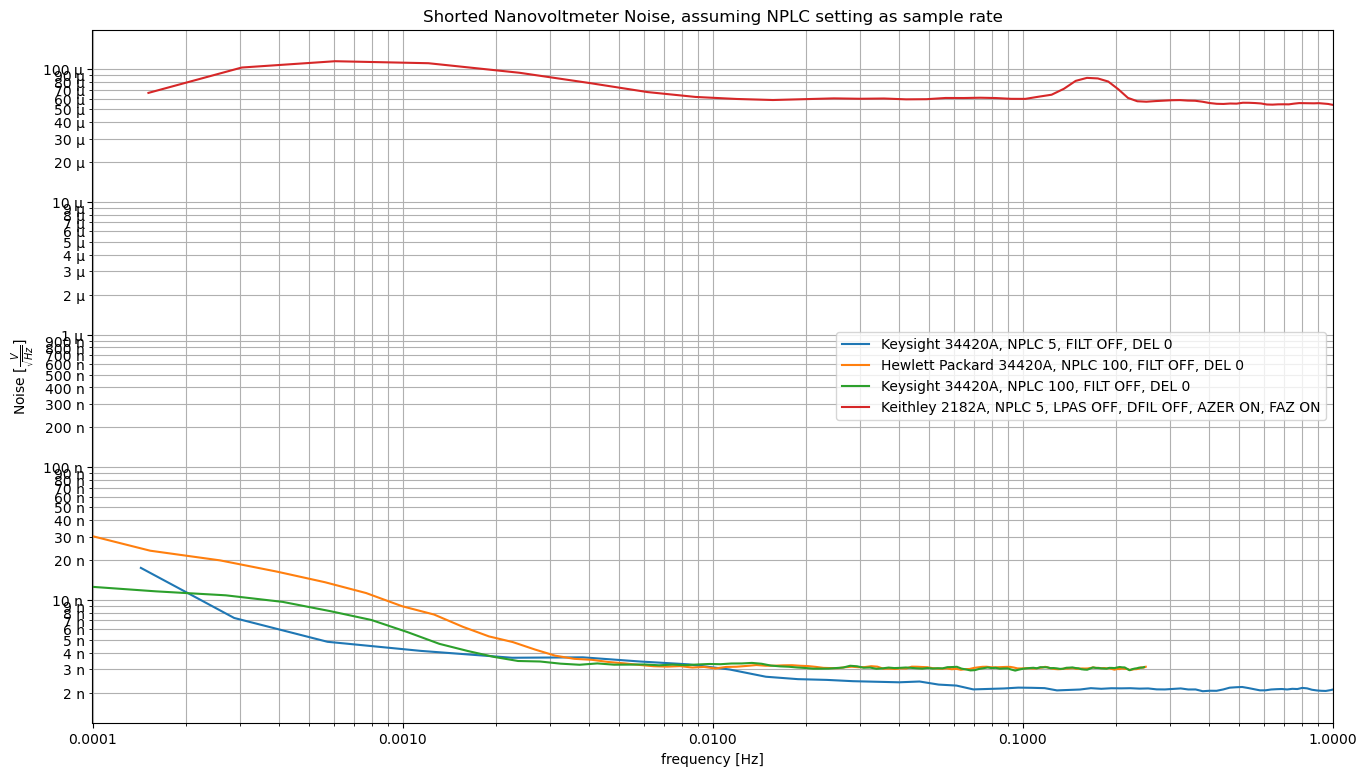

In [2]:
import pandas as pd
from lpsd import lpsd, flattop # https://gitlab.com/uhh-gwd/lpsd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import EngFormatter
import numpy as np

# Set up plot
fig,ax = plt.subplots(figsize=(16,9))
plt.loglog()
plt.xlim([0.0001,1])
plt.xlabel('frequency [Hz]')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.yaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_minor_formatter(EngFormatter())
plt.ylabel(r'Noise [$\frac{V}{\sqrt{Hz}}$]')
plt.grid(True, which="both")
plt.title('Shorted Nanovoltmeter Noise, assuming NPLC setting as sample rate')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20241109-204412_Keysight_34420A_short_NPLC5.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=10, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 5, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20240319-164251_HP_34420A_short_NPLC100.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Hewlett Packard 34420A, NPLC 100, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20240320-070507_Keysight_34420A_short_NPLC100.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 100, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/keithley-2182a/refs/heads/main/20240425-231708_Keithley_2182a_short_NPLC5.csv', header=24, names=['2182a_volt'])
spectrum = lpsd(df['2182a_volt'], sample_rate=10, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, np.sqrt(spectrum["asd"]), label='Keithley 2182A, NPLC 5, LPAS OFF, DFIL OFF, AZER ON, FAZ ON')

plt.legend()

In [12]:
import pandas as pd
from lpsd import lpsd, flattop # https://gitlab.com/uhh-gwd/lpsd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import EngFormatter
import numpy as np


# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/keithley-2182a/refs/heads/main/20240425-231708_Keithley_2182a_short_NPLC5.csv', header=24, names=['2182a_volt'])
spectrum = lpsd(df['2182a_volt'], sample_rate=10, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
spectrum["asd"]



frequency
0.000152    4.404692e-09
0.000303    1.062531e-08
0.000606    1.322444e-08
0.001212    1.234024e-08
0.002385    8.855598e-09
                ...     
4.649089    2.975960e-09
4.721553    2.975884e-09
4.794545    2.977876e-09
4.868075    3.000269e-09
4.942149    2.993225e-09
Name: asd, Length: 136, dtype: float32

In [ ]:
#%matplotlib widget
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import nsd	# https://github.com/EleDes/Noise-spectral-density-from-timeseries-Python
#import nsd_helper as nh	# https://github.com/EleDes/Noise-spectral-density-from-timeseries-Python
import pandas as pd
from lpsd import lpsd, flattop	# lpsd package, doc: https://gitlab.com/uhh-gwd/lpsd

# change accordingly
nsd_type = "LNSD" #LNSD (logarithmic) or NSD (welch)
data_ext = "csv"

data_type = "K182"
data_path = r"\\pi3lab"
data_dir = r"share\GPIB"
save_path = r"D:\Dokumente\Technische Dokumentationen\Messgeräte\Keithley 182-M"
data_file = "K182 low T-EMF short 3mV 20ms no filter 2022-07-04"
sample_rate = 1/20e-3

data_type = "3458A"
data_path = r"\\pi3lab"
data_dir = r"share\GPIB"
save_path = r"D:\Dokumente\Technische Dokumentationen\Messgeräte\HP3458A"
data_file = "3458A 10V 1NPLC fast - low T-EMF short"
data_file = "3458A 10V 1NPLC fast AZ - low T-EMF short"
sample_rate = 1/20e-3

#data_type = "34420A"
#data_path = r"D:\Dokumente\Technische Dokumentationen\Messgeräte"
#data_dir = r"Agilent 34420A Nanovoltmeter"
#save_path = r"D:\Dokumente\Technische Dokumentationen\Messgeräte\Agilent 34420A Nanovoltmeter"
#data_file = "20240314-162939_Keysight_34420A_short_NPLC100"	# https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/20240314-162939_Keysight_34420A_short_NPLC100.csv
#sample_rate = 1/2

# import data
if data_type == "K182":
    df = pd.read_table (f"{data_path}\{data_dir}\{data_file}.{data_ext}",  # our file
                        sep = '\t',                                         # column separator
                        header = 0,                                        # none as we define the name ourself
                        skipinitialspace = True,                           # convenient
                        skiprows = 6,                                      # if there is a header, put the number of rows here
                        #nrows = 100,                                      # only take n rows
                        usecols = [0, 1],                                     # which column has the values 1st = 0
                        names = ['datetime raw', 'value'],                                 # define name of the column
                        encoding = 'latin1')                               # put the encoding type of the file here
    df['datetime'] = pd.to_datetime(df['datetime raw'], format='ISO8601')

if data_type == "3458A":
    df = pd.read_table (f"{data_path}\{data_dir}\{data_file}.{data_ext}",  # our file
                        #sep = ',',                                         # column separator
                        sep = '\t',                                         # column separator
                        header = 0,                                        # none as we define the name ourself
                        skipinitialspace = True,                           # convenient
                        skiprows = 0,                                      # if there is a header, put the number of rows here
                        #nrows = 100,                                      # only take n rows
                        usecols = [0, 1],                                     # which column has the values 1st = 0
                        names = ['datetime raw', 'value'],                                 # define name of the column
                        encoding = 'latin1')                               # put the encoding type of the file here
    df['datetime'] = pd.to_datetime(df['datetime raw'], format='ISO8601')

if data_type == "34420A":
    df = pd.read_table (f"{data_path}\{data_dir}\{data_file}.{data_ext}",  # our file
                        sep = ',',                                         # column separator
                        header = 0,                                        # none as we define the name ourself
                        skipinitialspace = True,                           # convenient
                        skiprows = 1,                                      # if there is a header, put the number of rows here
                        #nrows = 100,                                      # only take n rows
                        usecols = [0, 1],                                     # which column has the values 1st = 0
                        names = ['datetime raw', 'value'],                                 # define name of the column
                        encoding = 'utf-8')                               # put the encoding type of the file here
    df['datetime'] = pd.to_datetime(df['datetime raw'], unit='s', origin='unix')

#df.dtypes

# calculate statistics of timeseries and print
df['diff ms'] = df['datetime'].diff().dt.total_seconds() * 1000
df['meas value'] = df['value']
diff_ms_mean = df['diff ms'].mean()
print(f"Mean: {diff_ms_mean:.3f}ms, SDev: {df['diff ms'].std():.3f}ms, Max: {df['diff ms'].max():.3f}ms, Min: {df['diff ms'].min():.3f}ms")
df.sort_values('diff ms', ascending=False)
sample_rate_calc = 1000/diff_ms_mean

# plot timeseries
#plt.xkcd()
fig, ax = plt.subplots(figsize=(15, 10))
# data
ax.plot(df['datetime'], df['meas value'], '-', ms=0.5, lw=0.5, label=data_file, alpha=0.4)
count = 1000
ax.plot(df['datetime'], df['meas value'].rolling(count, center=True).mean(), '-', ms=0.5, lw=0.5, label=f'Centered rolling mean({count}) - {diff_ms_mean*count/1000:.3f}s per DP', alpha=1)

# format
plt.title(data_file, fontsize=18)
ax.yaxis.set_major_formatter(EngFormatter(sep="", unit='V'))
#ax.set_ylim(-0.1, 0)
ax.grid(True, which="both")

plt.legend()

# save
fig.tight_layout()                              # Adjust spacings w.r.t. figsize
plt.rcParams['savefig.facecolor']='white'       # set background color for saving, standard is transparent
save_file = f"{save_path}\{data_file}.png"
plt.savefig(save_file, dpi=100)
print(f"Plot saved to: {save_file}")
#plt.plot()

# calculate NSD values
window_function = flattop.HFT90D
overlap = flattop.olap_dict["HFT90D"]
#window_function = np.ones
#overlap = flattop.olap_dict["HFT90D"] # flattop.olap_dict["FLATTOP"]
#window_function = flattop.HFT248D
#overlap = flattop.olap_dict["HFT248D"]

if nsd_type == "NSD":
    nsd_values = nsd.get(df['value'], sample_rate, crop=np.s_[4:-2], nsd_bins=int(len(values)/4)) #, nsd_bins=int(len(values)/25), nsd_bins, window_function=nsd.window_flattop)
    series_rms=nsd.series_rms(df['value'])
    print(f'Series RMS: {series_rms:.2e}, NSD RMS (SPS): {nsd_rms:.2e}, NSD RMS (calc SPS): {nsd_rms1:.2e}')

if nsd_type == "LNSD":
    nsd_values = lpsd(df['value'], sample_rate=sample_rate, n_frequencies=100000, n_averages=300000, window_function=window_function, overlap = overlap, detrending_order=1) #, n_frequencies=1000, n_averages=10000, window_function=flattop.HFT90D, n_averages=100, detrending_order=1
    nsd_values1 = lpsd(df['value'], sample_rate=sample_rate_calc, n_frequencies=100000, n_averages=300000, window_function=window_function, overlap = overlap, detrending_order=1) #, n_frequencies=1000, n_averages=10000, window_function=flattop.HFT90D, n_averages=100, detrending_order=1
    nsd_rms = nsd.nsd_rms((nsd_values.index.values, nsd_values["asd"].values))
    nsd_rms1 = nsd.nsd_rms((nsd_values1.index.values, nsd_values1["asd"].values))
    crop = 4
    nsd_values = (nsd_values.iloc[crop:].index.values, nsd_values["asd"].iloc[crop:].values)
    nsd_values1 = (nsd_values1.iloc[crop:].index.values, nsd_values1["asd"].iloc[crop:].values)
#    nsd_values = (nsd_values.index.values, nsd_values["asd"].values)
    series_rms=nsd.series_rms(df['value'])
    print(f'Series RMS: {series_rms:.2e}, NSD RMS (SPS): {nsd_rms:.2e}, NSD RMS (calc SPS): {nsd_rms1:.2e}')
	
	def plotnsd(freq, values, label, freq2=None, values2=None, label2=None, freq3=None, values3=None, label3=None):

    # add linear noise values as we have only a few
    freq_to_1Hz = freq[freq < 0.5] # only below 1Hz
    freq_1kHz_to_100kHz = np.geomspace(1_000, 100_000, num=1_000_000)
    freq_fit = np.append(freq_to_1Hz, freq_1kHz_to_100kHz)
    values_fit = np.append(values[0:len(freq_to_1Hz)], np.full(len(freq_1kHz_to_100kHz), 730e-12)) #3e-9, 730e-12
    # fit
    geomspace = np.geomspace(freq[0], freq[-1], num=128)

    # no changes
#    freq_fit = np.array(freq2)[np.array(freq2) > 10e-3]
#    values_fit = np.array(values2)[np.array(freq2) > 10e-3]
    freq_fit = freq[freq > 1e-3]
    values_fit = values[freq > 1e-3]
    
#    # loglog space
#    popt1, pcov1 = nsd.fit_loglog([freq_fit, values_fit])
#    perr1 = np.sqrt(np.diag(pcov1))   # one standard deviation errors on the parameters
#    popt1_eng = nh.eng(popt1)
#    print (f'Parameter: {popt1_eng}, one Std: {nh.eng(perr1)}')
##    noises.append({'nsd': [geomspace, nsd.fit_function((geomspace), *popt1)], 'label': f'target {sample_rate}SPS fit to a/f^b + c (least squares in loglog space): a={popt1_eng[0]}, b={popt1_eng[1]}, c={popt1_eng[2]}'})

    
    # Plot
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.plot(freq, values, '-o', ms=0.5, lw=0.5, label=label)
    try:
        plt.plot(freq2, values2, '-o', ms=0.5, lw=0.5, label=label2)
    except:
        print("No 2nd plot awailable")
    try:
        plt.plot(freq3, values3, '-', ms=0.5, lw=0.5, label=label3)
    except:
        print("No 3rd plot awailable")
    try:
        plt.plot(geomspace, nsd.fit_function((geomspace), *popt1), '-', ms=0.5, lw=0.5, label=f"Best fit to a/f^b + c (least squares in loglog space): a={popt1_eng[0]}, b={popt1_eng[1]}, c={popt1_eng[2]} ({sample_rate:.1f}SPS)")
    except:
        print("No 3rd plot awailable")
    plt.xlabel('frequency in Hz')
    plt.ylabel(r'noise in V/$\sqrt{Hz}$')
    plt.loglog()
    plt.grid(True, which="both")
    formatter1 = EngFormatter(sep="")
    ax.xaxis.set_major_formatter(formatter1)
    ax.yaxis.set_major_formatter(formatter1)
    ax.yaxis.set_minor_formatter(formatter1)

    ax.xaxis.get_major_locator().set_params(numticks=20)
    ax.xaxis.get_minor_locator().set_params(numticks=999, subs="auto")

    #ax.set_ylim(10**-9.5, 10**-6)
    #ax.set_xlim(1e-3, 1e5)

    fig.tight_layout()                                                 # Adjust spacings w.r.t. figsize
    plt.legend()

    #save plot
    plt.rcParams['savefig.facecolor']='white'                          # set background color for saving, standard is transparent
    plt.savefig(f"{save_path}\{data_file} - {nsd_type}.png")   # change name accordingly

    plt.show()
	
def save_data_raw(data, filename):
    import pickle
    #with open(filename, "xb") as f:
    with open(filename, "wb") as f:					# overwrite existing file
        #f.write(data)
        pickle.dump(data, f)
		
## fit
#geomspace = np.geomspace(nsd_values[0][0], nsd_values[0][-1], num=64)
#
## loglog space
#popt1, pcov1 = nsd.fit_loglog(nsd_values)
#perr1 = np.sqrt(np.diag(pcov1))   # one standard deviation errors on the parameters
#popt1_eng = nh.eng(popt1)
#print (f'Parameter: {popt1_eng}, one Std: {nh.eng(perr1)}')
#label = f'fit to a/f^b + c (least squares in loglog space): a={popt1_eng[0]}, b={popt1_eng[1]}, c={popt1_eng[2]}'

points = 128
smoothed = nsd.smooth(nsd_values, points, filter_function=np.median)
label = f"smoothed median {points}pts"

plotnsd(nsd_values[0], nsd_values[1], data_file + f" {sample_rate:.3f}SPS", nsd_values1[0], nsd_values1[1], data_file + f" {sample_rate_calc:.3f}SPS")    # nsd frequencies, nsd values, name of the #plotnsd(nsd_values[0], nsd_values[1], data_file, smoothed[0], smoothed[1], label, nsd_ULF_ULNA['frequencys'], nsd_ULF_ULNA['values'], "orig. ULNA (best fit to Fig. 5), -3dB @0.7mHz (orig. 4mHz)")    # nsd frequencies, nsd values, name of the series

#save NSD
nsd_avg_values = list()
nsd_avg_values.append(nsd_values[0])
nsd_avg_values.append(nsd_values[1])
nsd_file = f"{save_path}\{data_file}.{nsd_type.lower()}"
save_data_raw(nsd_avg_values, nsd_file)
print(f"{len(nsd_values[0])} NSD average values written to: {nsd_file}")